In [1]:
import pycocotools.coco as coco
import os

In [2]:
datadir = 'D:\Paralaxiom Tutorials\dataset_analysis\\annotations'
dataFile = 'instances_val2017.json'
coco = coco.COCO(os.path.join(datadir, dataFile))

loading annotations into memory...
Done (t=1.59s)
creating index...
index created!


In [3]:
coco.dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [4]:
len(coco.dataset['images'])

5000

In [16]:
len(coco.dataset['categories'])
coco.dataset['categories'][0].keys()

dict_keys(['supercategory', 'id', 'name'])

In [11]:
len(coco.dataset['annotations']) # 36781
coco.dataset['annotations'][0].keys() # dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
coco.dataset['annotations'][26]['bbox']

[126.74, 240.09, 109.25, 87.4]

In [13]:
coco.createIndex()

creating index...
index created!


In [7]:
categories = coco.loadCats(coco.getCatIds())
categoryNames = [cat['name'] for cat in categories]
supercategoryNames = set(cat['supercategory'] for cat in categories)


In [6]:
categoryImagesDict = dict()

for catName in categoryNames:
    categoryImagesDict[catName] = coco.getImgIds(catIds = coco.getCatIds(catNms = [catName]))

In [1]:
from CocoAnalysis import Dataset
import matplotlib.pyplot as plt

In [2]:
dataset = Dataset('D:\\Paralaxiom Tutorials\\dataset_analysis\\annotations\\instances_val2017.json')
    
print('The Dataset has {} categorie(s)'.format(len(dataset.getCategoryNames())))

print('The dataset has {} supercategorie(s)'.format(len(dataset.getSuperCategoryNames())))

minBbox, maxBbox = dataset.getMinMaxBBox()
print('In dataset, this is the min count of bbox in any image : {}, this is the max count of bbox in any image : {}'.format(minBbox, maxBbox))


loading annotations into memory...
Done (t=0.67s)
creating index...
index created!
The Dataset has 80 categorie(s)
The dataset has 12 supercategorie(s)
In dataset, this is the min count of bbox in any image : 1, this is the max count of bbox in any image : 63


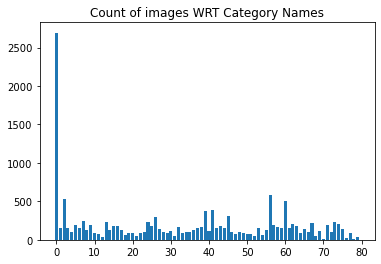

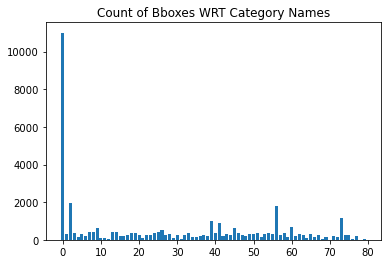

In [3]:
names = dataset.getCategoryImagesDict().keys()
values = [len(value) for value in dataset.getCategoryImagesDict().values()]

plt.figure(5)
plt.bar(range(len(names)), values)
plt.title(label = 'Count of images WRT Category Names')
plt.show()

names = dataset.getCatToNoBbox().keys()
values = dataset.getCatToNoBbox().values()

plt.figure(5)
plt.bar(range(len(names)), values)
plt.title(label = 'Count of Bboxes WRT Category Names')
plt.show()


In [4]:
print(dataset.getCatMinMaxArea())

{'person': (4.0040000000000004, 373562.64149999997), 'bicycle': (61.837199999999996, 300794.176), 'car': (13.935899999999998, 299222.4), 'motorcycle': (15.323, 310143.43200000003), 'airplane': (41.533, 240609.76919999998), 'bus': (15.406999999999998, 301687.67199999996), 'train': (713.8291999999999, 409094.4), 'truck': (102.8016, 300292.8), 'boat': (6.772499999999999, 268801.7934), 'traffic light': (2.5134, 78980.0616), 'fire hydrant': (24.241999999999997, 228779.01279999997), 'stop sign': (32.8252, 206706.3309), 'parking meter': (34.1515, 97150.284), 'bench': (32.589, 297443.4633), 'bird': (3.396, 234146), 'cat': (775.086, 351086.839), 'dog': (17.304, 338032.227), 'horse': (20.6264, 185745.33879999997), 'sheep': (25.137, 302547.7876), 'cow': (14.7074, 280247.9316), 'elephant': (212.23559999999998, 305602), 'bear': (442.34979999999996, 329662.40580000007), 'zebra': (265.3828, 270478.0008), 'giraffe': (51.80159999999999, 284476.388), 'backpack': (13.5228, 98515.7226), 'umbrella': (4.787